In [4]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
# load data using pandas

df = pd.read_csv('data.csv')
df

,x1,x2,y
0,-119.366669,1.150000e+02,1
1,-101.108044,9.777716e+01,1
2,-130.278658,1.067677e+02,1
3,-114.703415,1.011955e+02,1
4,-119.366669,1.150000e+02,1
...,...,...,...
2222,98.714112,8.964312e+01,0
2223,96.633331,9.100000e+01,0
2224,85.673940,1.038393e+02,0
2225,78.958862,7.860537e+01,0


In [7]:
df.shape #rows and columns

(2227, 3)

In [8]:
df.head()

,x1,x2,y
0,-119.366669,115.000000,1
1,-101.108044,97.777159,1
2,-130.278658,106.767654,1
3,-114.703415,101.195477,1
4,-119.366669,115.000000,1


In [9]:
df.y.value_counts()

0    1242
1     985
Name: y, dtype: int64

In [10]:
# normalize value counts
df.y.value_counts(normalize=True)

0    0.557701
1    0.442299
Name: y, dtype: float64

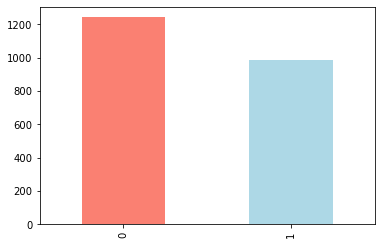

In [13]:
# plotting value counts with a bar graph
df.y.value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2227 entries, 0 to 2226
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      2222 non-null   float64
 1   x2      2224 non-null   float64
 2   y       2227 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 52.3 KB


In [16]:
df.describe()

,x1,x2,y
count,2222.000000,2.224000e+03,2227.000000
mean,-4.818766,8.947626e+04,0.442299
std,74.939909,2.983323e+06,0.496771
min,-134.369160,-1.348761e+02,0.000000
25%,-71.757030,-8.012983e+01,0.000000
50%,-9.836555,-1.046151e+00,0.000000
75%,59.813962,6.389086e+01,1.000000
max,134.508687,1.000000e+08,1.000000


In [18]:
df.x1.value_counts()

-118.366669    8
 31.633331     6
 30.633331     5
 78.633331     5
-86.366669     5
              ..
 58.434396     1
 18.408090     1
-99.593049     1
-72.501026     1
 54.003740     1
Name: x1, Length: 1887, dtype: int64

In [19]:
df.x2.value_counts()

-55.000000     7
-113.000000    7
 115.000000    6
-119.000000    6
 126.000000    6
              ..
-126.943566    1
-130.800339    1
-114.715946    1
-80.804223     1
 12.982108     1
Name: x2, Length: 1884, dtype: int64

In [20]:
df.y.value_counts()

0    1242
1     985
Name: y, dtype: int64

In [22]:
df.isnull().sum()


x1    5
x2    3
y     0
dtype: int64

In [29]:
df.dropna(subset=["x1"], inplace=True)

In [30]:
df.isnull().sum()

x1    0
x2    3
y     0
dtype: int64

In [31]:
df.dropna(subset=["x2"], inplace=True)

df.isnull().sum()

x1    0
x2    0
y     0
dtype: int64

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2219 entries, 0 to 2226
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      2219 non-null   float64
 1   x2      2219 non-null   float64
 2   y       2219 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 69.3 KB


In [34]:
df.shape

(2219, 3)

## models ##

`logistic Regression`
`svm with linear Kernal`
`svm with RBf kernal`
`Decission tree`
`Knn`



In [99]:
# from sklearn import models

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [100]:
# importing model evaluators from sklearn
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

In [101]:
df.isna().sum()

x1    0
x2    0
y     0
dtype: int64

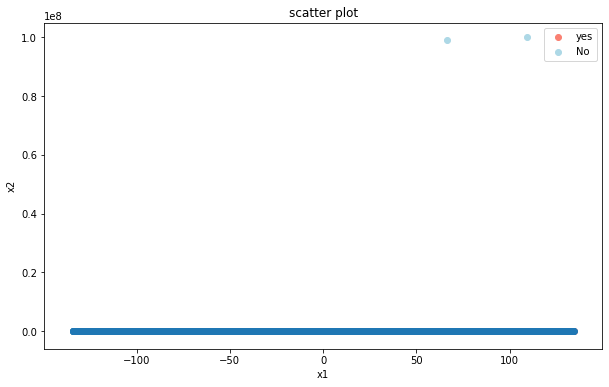

In [113]:
# trying to plot a scatter plot
plt.figure(figsize=(10,6))

plt.scatter(df.x1[df.y==1],
          df.x2[df.y==1],
          c="salmon")

plt.scatter(df.x1[df.y==0],
          df.x2[df.y==0],
          c="lightblue")

plt.title("scatter plot")
plt.xlabel("x1")
plt.legend(["yes", "No"])
plt.ylabel("x2")
plt.scatter('x1', 'y' ,data=df, marker='o')
plt.show();

In [102]:
np.random.seed(72)

# splitting data into train and test

X = df.drop("y", axis=1)
y = df["y"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, # independent variables 
                                                    y, # dependent variable
                                                    test_size = 0.2)



In [73]:
X

,x1,x2
0,-119.366669,1.150000e+02
1,-101.108044,9.777716e+01
2,-130.278658,1.067677e+02
3,-114.703415,1.011955e+02
4,-119.366669,1.150000e+02
...,...,...
2222,98.714112,8.964312e+01
2223,96.633331,9.100000e+01
2224,85.673940,1.038393e+02
2225,78.958862,7.860537e+01


In [76]:
y

0       1
1       1
2       1
3       1
4       1
       ..
2222    0
2223    0
2224    0
2225    0
2226    0
Name: y, Length: 2219, dtype: int64

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2219 entries, 0 to 2226
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      2219 non-null   float64
 1   x2      2219 non-null   float64
 2   y       2219 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 69.3 KB


In [78]:
X_train

,x1,x2
1041,69.633331,67.000000
2012,-6.366669,-2.000000
1266,118.633331,129.000000
2195,72.633331,64.000000
1022,78.163923,69.697267
...,...,...
364,-22.674347,-16.619693
1717,-97.746127,-101.120692
1074,45.832616,21.827656
1819,-24.431197,-30.991680


In [79]:
y_train, len(y_train)

(1041    0
 2012    0
 1266    0
 2195    0
 1022    0
        ..
 364     1
 1717    0
 1074    0
 1819    0
 476     1
 Name: y, Length: 1775, dtype: int64,
 1775)

In [107]:
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "SVM": LinearSVC(),
          "Decision Tree": DecisionTreeClassifier()}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of differetn Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    # Set random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [108]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)

model_scores

c:\users\vamshi\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\vamshi\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


{'Logistic Regression': 0.5923423423423423,
 'KNN': 0.9662162162162162,
 'SVM': 0.7027027027027027,
 'Decision Tree': 0.9504504504504504}

### Model Comparision (which is best in this case)

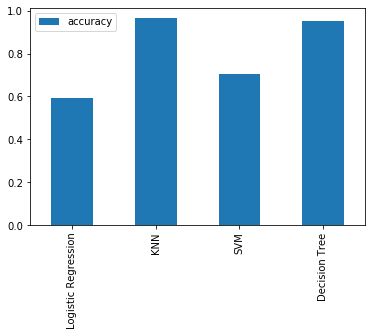

In [109]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

### Observations

## In this case it is clear that KNN gives more accuracy with respect to other models.

#### There is lot more to do like hyperparameter tuning 

- ROC curve and AUC score
- Confusion matrix
- Classification report
- Precision
- Recall
- F1-score